# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [1]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file
df1 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet")
df2 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-2.parquet")
df3 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-3.parquet")
df4 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-4.parquet")
df5 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-5.parquet")
df6 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-6.parquet")
df7 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-7.parquet")
df8 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-8.parquet")
df9 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-9.parquet")
df10 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-10.parquet")
df11 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-11.parquet")
df12 = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-12.parquet")


In [4]:
pip install pandas pyarrow


   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.3 MB 5.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.8/25.3 MB 4.0 MB/s eta 0:00:06
   ---- ----------------------------------- 2.6/25.3 MB 3.9 MB/s eta 0:00:06
   ---- ----------------------------------- 3.1/25.3 MB 3.8 MB/s eta 0:00:06
   ------ --------------------------------- 4.2/25.3 MB 3.8 MB/s eta 0:00:06
   ------- -------------------------------- 5.0/25.3 MB 3.8 MB/s eta 0:00:06
   --------- ------------------------------ 5.8/25.3 MB 3.8 MB/s eta 0:00:06
   ---------- ----------------------------- 6.6/25.3 MB 3.8 MB/s eta 0:00:05
   ----------- ---------------------------- 7.3/25.3 MB 3.7 MB/s eta 0:00:05
   ------------ --------------------------- 7.9/25.3 MB 3.7 MB/s eta 0:00:05
   ------------- -------------------------- 8.4/25.3 MB 3.6 MB/s eta 0:00:05
   -------------- ------------------------- 9.2/25.3 MB 3.5 MB/s eta 0:00:05
   --

In [10]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()
df7.info()
df8.info()
df9.info()
df10.info()
df11.info()
df12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Selecting the dataset folder
import os

# Selecting the dataset folder
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# listing of all the 12 files
file_list = os.listdir()

# Empty dataframe initiselise
df = pd.DataFrame()


# iterate all the files and make sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # store the sampled data of current date in df by appending the sampled data from every hour to this

        sampled_data = pd.DataFrame()

        
                # Sample 5% of the hourly data randomly

               
        # Concatenate the sampled data of all the dates to a single dataframe
        df = 

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [19]:
import os
import pandas as pd

# Selectection of folder of data files
os.chdir("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records")

# Create a list
file_list = os.listdir()

#empty dataframe
df = pd.DataFrame()

#Target range of rows
min_rows = 250000
max_rows = 300000


for file_name in file_list:
    try:
    
        file_path = os.path.join(os.getcwd(), file_name)

        data = pd.read_parquet(file_path, engine="pyarrow")

        if "tpep_pickup_datetime" not in data.columns:
            print(f"Skipping {file_name}, no 'tpep_pickup_datetime' column found.")
            continue


        data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])

      
        sampled_data = pd.DataFrame()

       
        for date in data["tpep_pickup_datetime"].dt.date.unique():
            daily_data = data[data["tpep_pickup_datetime"].dt.date == date]

           
            for hour in range(24):
                hourly_data = daily_data[daily_data["tpep_pickup_datetime"].dt.hour == hour]

               
                if hourly_data.empty:
                    continue  

                # Adjusing the sample percentage
                remaining_rows = max_rows - len(df)
                sample_fraction = min(0.05, remaining_rows / len(hourly_data)) 
                if sample_fraction > 0:
                    sampled_hourly_data = hourly_data.sample(frac=sample_fraction, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hourly_data], ignore_index=True)

        
                if len(df) + len(sampled_data) >= max_rows:
                    break  
            
            
            if len(df) + len(sampled_data) >= max_rows:
                break  

       
        df = pd.concat([df, sampled_data], ignore_index=True)

        # Stop when total rows exceed by max_rows
        if len(df) >= max_rows:
            break

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


df = df.sample(n=max_rows, random_state=42) if len(df) > max_rows else df

#final sampled dataset
df.to_csv("sampled_data.csv", index=False)
print(f"Sampling completed with {len(df)} rows. Data saved as 'sampled_data.csv'.")


Sampling completed with 300000 rows. Data saved as 'sampled_data.csv'.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [53]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet("sampled_data.parquet", engine="pyarrow", index=False)
df.to_parquet("D:/Datasets and Dictionary-NYC/sampled_data.parquet", engine="pyarrow", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [23]:
# Load the new data file
df_loaded = pd.read_parquet("D:/Datasets and Dictionary-NYC/sampled_data.parquet", engine="pyarrow")

In [24]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
242547         1  2023-10-17 15:21:46   2023-10-17 15:47:43              1.0   
19593          2  2023-01-05 18:21:15   2023-01-05 18:26:00              4.0   
108738         2  2023-01-23 14:51:33   2023-01-23 14:55:36              1.0   
13430          2  2023-01-04 14:56:41   2023-01-04 15:19:01              1.0   
49138          1  2023-01-11 20:19:28   2023-01-11 20:27:22              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
242547           3.10         1.0                  N           162   
19593            0.86         1.0                  N           142   
108738           0.70         1.0                  N           161   
13430            3.21         1.0                  N            75   
49138            1.40         1.0                  N           162   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
242547           148             1         20.5    2.5      0.5        4.90   
19593            239             1          6.5    2.5      0.5        6.50   
108738           237             1          6.5    0.0      0.5        2.62   
13430            143             1         21.9    0.0      0.5        1.00   
49138            107             1          9.3    3.5      0.5        2.85   

        tolls_amount  improvement_surcharge  total_amount  \
242547           0.0                    1.0         29.40   
19593            0.0                    1.0         19.50   
108738           0.0                    1.0         13.12   
13430            0.0                    1.0         26.90   
49138            0.0                    1.0         17.15   

        congestion_surcharge  airport_fee  Airport_fee  
242547                   2.5          NaN          0.0  
19593                    2.5          0.0          NaN  
108738                   2.5          0.0          NaN  
13430                    2.5          0.0          NaN  
49138                    2.5          0.0          NaN

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 242547 to 217851
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        290168 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             290168 non-null  float64       
 6   store_and_fwd_flag     290168 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [26]:
# Fix the index and drop any columns that are not needed
df_loaded.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [27]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [29]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
print(negative_fares)
print(negative_fares.describe())

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []
       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
count       0.0                    0                     0              0.0   
mean        NaN                  NaT                   NaT              NaN   
min         NaN                  NaT                   NaT              NaN   
25%         NaN                  NaT                   NaT              NaN   
50%         NaN                  NaT                   NaT              NaN   
75%         NaN                  NaT                   NaT              NaN   
max         NaN                  NaT                   NaT              NaN   
std         NaN                  NaN        

Did you notice something different in the `RatecodeID` column for above records?

In [32]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]
print(negative_fares[['fare_amount', 'RatecodeID']])
ratecode_counts = negative_fares['RatecodeID'].value_counts()
print(ratecode_counts)


Empty DataFrame
Columns: [fare_amount, RatecodeID]
Index: []
Series([], Name: count, dtype: int64)


In [30]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include=['number']).lt(0).any()
print(negative_columns[negative_columns == True])

extra                    True
mta_tax                  True
improvement_surcharge    True
total_amount             True
congestion_surcharge     True
airport_fee              True
dtype: bool


In [33]:
# fix these negative values
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0




### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [34]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0])

passenger_count         3.277333
RatecodeID              3.277333
store_and_fwd_flag      3.277333
congestion_surcharge    3.277333
airport_fee             3.277333
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [36]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", missing_rows)

df.loc[:, 'passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])

Rows with missing values:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
213477         2  2023-10-13 13:36:24   2023-10-13 13:50:01              1.0   
258499         2  2023-10-20 07:19:00   2023-10-20 07:34:00              1.0   
267647         1  2023-10-21 17:41:02   2023-10-21 17:55:30              1.0   
271685         1  2023-10-22 10:32:44   2023-10-22 10:38:05              1.0   
62825          1  2023-01-14 12:14:38   2023-01-14 12:18:12              1.0   
...          ...                  ...                   ...              ...   
112296         1  2023-01-24 10:32:20   2023-01-24 10:48:04              1.0   
283501         2  2023-10-24 17:57:00   2023-10-24 18:12:00              1.0   
51663          1  2023-01-12 12:15:26   2023-01-12 12:26:02              1.0   
202982         2  2023-10-10 16:08:54   2023-10-10 16:18:52              1.0   
297366         2  2023-10-26 21:47:43   2023-10-26 22:14:29              1.0   

        trip

Did you find zeroes in passenger_count? Handle these.

In [37]:
zero_count = (df['passenger_count'] == 0).sum()
print(f"Number of zero values in 'passenger_count': {zero_count}")


Number of zero values in 'passenger_count': 4628


In [38]:
# Replace zero values with mode (most frequent value)
if zero_count > 0:
    mode_value = df['passenger_count'].mode()[0]
    df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode_value
    print(f"Replaced {zero_count} zero values with mode: {mode_value}")

# To erify if zero still exist
print("Remaining zero values in 'passenger_count':", (df['passenger_count'] == 0).sum())

Replaced 4628 zero values with mode: 1.0
Remaining zero values in 'passenger_count': 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [40]:
# Fix missing values in 'RatecodeID'
# Count missing values in 'RatecodeID'
missing_ratecode = df['RatecodeID'].isna().sum()
print(f"Missing values in 'RatecodeID': {missing_ratecode}")

if missing_ratecode > 0:
    mode_value = df['RatecodeID'].mode()[0]
    df = df.assign(RatecodeID=df['RatecodeID'].fillna(mode_value))  # Correct way to avoid warning
    print(f"Replaced {missing_ratecode} missing values with mode: {mode_value}")

print("Remaining missing values in 'RatecodeID':", df['RatecodeID'].isna().sum())


Missing values in 'RatecodeID': 0
Remaining missing values in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [41]:
# handle null values in congestion_surcharge
# Check missing values in 'congestion_surcharge'
missing_congestion = df['congestion_surcharge'].isna().sum()
print(f"Missing values in 'congestion_surcharge': {missing_congestion}")

if missing_congestion > 0:
    # Analyze distribution
    print(df['congestion_surcharge'].describe())

    # Replacethe missing values
    mode_value = df['congestion_surcharge'].mode()[0]
    df = df.assign(congestion_surcharge=df['congestion_surcharge'].fillna(mode_value)) 
    
    print(f"Replaced {missing_congestion} missing values with mode: {mode_value}")

#Verify the missing values
print("Remaining missing values in 'congestion_surcharge':", df['congestion_surcharge'].isna().sum())

Missing values in 'congestion_surcharge': 9832
count    290168.000000
mean          2.311988
std           0.659664
min          -2.500000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64
Replaced 9832 missing values with mode: 2.5
Remaining missing values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [42]:
# Handle any remaining missing values
# Find the columns have missing values
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)

# Handle the missing values
for col in missing_values.index:
    if df[col].dtype == 'object':  
        # Filling the categorical columns by mode
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"Filled missing values in '{col}' with mode: {mode_value}")
    else:
        # Filling the numerical columns by median
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Filled missing values in '{col}' with median: {median_value}")

#check the remaing missing values
print("\nMissing values after handling:\n", df.isna().sum().sum())




Columns with missing values:
 store_and_fwd_flag    9832
airport_fee           9832
dtype: int64
Filled missing values in 'store_and_fwd_flag' with mode: N
Filled missing values in 'airport_fee' with median: 0.0

Missing values after handling:
 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [45]:
# Describe the data and check if there are any potential outliers present
print(df.describe())

# Check for potential out of place values in various columns


            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.730177  2023-05-30 09:47:38.398793  2023-05-30 10:04:31.981057   
min         1.000000         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%         1.000000  2023-01-16 21:28:32.500000  2023-01-16 21:43:44.500000   
50%         2.000000  2023-01-31 17:04:19.500000         2023-01-31 17:22:02   
75%         2.000000         2023-10-14 10:23:35  2023-10-14 10:37:58.500000   
max         6.000000         2023-10-27 11:59:31         2023-10-28 00:56:59   
std         0.445293                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.362137       3.572099       1.557253     165.870680   
min           1.000000       0.000000       1.000000       1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [50]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [46]:
#trip_distance is nearly 0 and fare_amount is more than 300
outlier_fare_distance = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print("Outliers with nearly 0 distance but high fare:\n", outlier_fare_distance)

Outliers with nearly 0 distance but high fare:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38085          1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
199729         2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
90267          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
258172         2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
46484          1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
215415         1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
38085             0.0         5.0                  N           141   
199729            0.0         5.0                  N           100   
90267             0.0         5.0                  N           265   
258172            0.0         5.0                  N           265   
46484             0.0        99.0        

In [47]:
#trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
outlier_zero_fare_distance = df[
    (df['trip_distance'] == 0) & 
    (df['fare_amount'] == 0) & 
    (df['PULocationID'] != df['DOLocationID'])
]
print("Entries where distance & fare are 0 but locations differ:\n", outlier_zero_fare_distance)


Entries where distance & fare are 0 but locations differ:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
159342         1  2023-10-02 14:05:53   2023-10-02 14:06:12              1.0   
163084         1  2023-10-03 09:03:22   2023-10-03 09:30:54              1.0   
244846         1  2023-10-17 21:13:10   2023-10-17 21:13:10              1.0   
142069         1  2023-01-29 18:33:14   2023-01-29 18:33:14              1.0   
43681          1  2023-01-10 19:28:41   2023-01-10 20:14:48              1.0   
172820         2  2023-10-04 21:02:32   2023-10-04 21:02:36              4.0   
83048          1  2023-01-18 15:42:00   2023-01-18 15:42:00              1.0   
286878         1  2023-10-25 09:26:51   2023-10-25 09:43:58              1.0   
174416         1  2023-10-05 08:58:47   2023-10-05 08:59:12              1.0   
285174         1  2023-10-24 21:22:17   2023-10-24 21:22:17              1.0   
259737         1  2023-10-20 11:05:37   2023-10-20 11:05:37  

In [48]:
#trip_distance is more than 250 miles
outlier_long_distance = df[df['trip_distance'] > 250]
print("Trips with unusually high distance:\n", outlier_long_distance)


Trips with unusually high distance:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
152189         2  2023-10-01 00:05:00   2023-10-01 00:19:00              1.0   
30438          2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
137589         2  2023-01-28 20:39:00   2023-01-28 20:59:00              1.0   
136826         2  2023-01-28 18:16:37   2023-01-28 18:41:22              1.0   
111442         2  2023-01-24 06:27:00   2023-01-24 07:18:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
152189       34804.51         1.0                  N           263   
30438          721.26         1.0                  N           145   
137589       10451.89         1.0                  N           142   
136826        2003.03         1.0                  N            48   
111442        3253.99         1.0                  N           230   

        DOLocationID  payment_type  fare_amount  extra  mta_t

In [49]:
#payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
outlier_payment = df[df['payment_type'] == 0]
print("Invalid payment type entries:\n", outlier_payment)


Invalid payment type entries:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
213477         2  2023-10-13 13:36:24   2023-10-13 13:50:01              1.0   
258499         2  2023-10-20 07:19:00   2023-10-20 07:34:00              1.0   
267647         1  2023-10-21 17:41:02   2023-10-21 17:55:30              1.0   
271685         1  2023-10-22 10:32:44   2023-10-22 10:38:05              1.0   
62825          1  2023-01-14 12:14:38   2023-01-14 12:18:12              1.0   
...          ...                  ...                   ...              ...   
112296         1  2023-01-24 10:32:20   2023-01-24 10:48:04              1.0   
283501         2  2023-10-24 17:57:00   2023-10-24 18:12:00              1.0   
51663          1  2023-01-12 12:15:26   2023-01-12 12:26:02              1.0   
202982         2  2023-10-10 16:08:54   2023-10-10 16:18:52              1.0   
297366         2  2023-10-26 21:47:43   2023-10-26 22:14:29              1.0   

        

In [51]:
# Continue with outlier handling
# Remove invalid trips
df = df[~df.index.isin(outlier_fare_distance.index)]
df = df[~df.index.isin(outlier_zero_fare_distance.index)]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]

In [52]:
# Do any columns need standardising?
# datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# fare and total_amount are non-negative
df = df[df[['fare_amount', 'total_amount']].ge(0).all(axis=1)]

# Standardize store_and_fwd_fla
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

# Change the RatecodeID and payment_type to categorical
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')

# Standardizing the trip_distance
df['trip_distance'] = df['trip_distance'].apply(lambda x: x * 1.60934)  # Convert miles to km

#check for final
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 290132 entries, 242547 to 217851
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               290132 non-null  int64         
 1   tpep_pickup_datetime   290132 non-null  datetime64[us]
 2   tpep_dropoff_datetime  290132 non-null  datetime64[us]
 3   passenger_count        290132 non-null  float64       
 4   trip_distance          290132 non-null  float64       
 5   RatecodeID             290132 non-null  category      
 6   store_and_fwd_flag     290132 non-null  int64         
 7   PULocationID           290132 non-null  int64         
 8   DOLocationID           290132 non-null  int64         
 9   payment_type           290132 non-null  category      
 10  fare_amount            290132 non-null  float64       
 11  extra                  290132 non-null  float64       
 12  mta_tax                290132 non-null  floa

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [53]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [54]:
# Categorizing columns into numerical and categorical
categorical_cols = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']
numerical_cols = ['passenger_count', 'trip_distance', 'pickup_hour', 'trip_duration', 
                  'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                  'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Display results
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Checking data types of the dataframe
print(df.dtypes)


Categorical Columns: ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']
Numerical Columns: ['passenger_count', 'trip_distance', 'pickup_hour', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag                int64
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                   

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

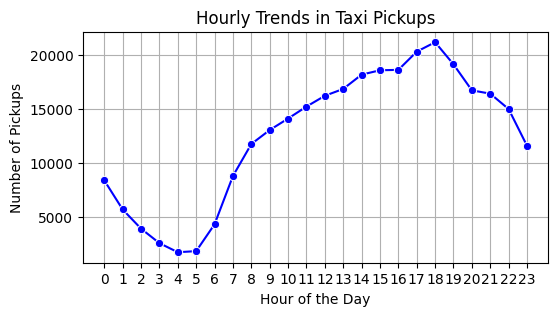

In [54]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import seaborn as sns

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Graph for the hourly trend
plt.figure(figsize=(6, 3))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o', color='b')
plt.xticks(range(0, 24))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.grid()
plt.show()

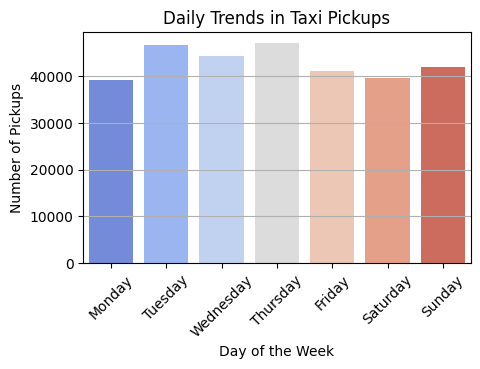

In [55]:
# Find and show the daily trends in taxi pickups (days of the week)
import matplotlib.pyplot as plt
import seaborn as sns

# Extraction of day from the pickup datetimme
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Per day pickup counts
daily_pickups = df['pickup_day'].value_counts()

# correct order of days (Monday to Sunday)
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_pickups = daily_pickups.reindex(order)

# daily trend graph
plt.figure(figsize=(5, 3))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, hue=daily_pickups.index, palette="coolwarm", legend=False)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


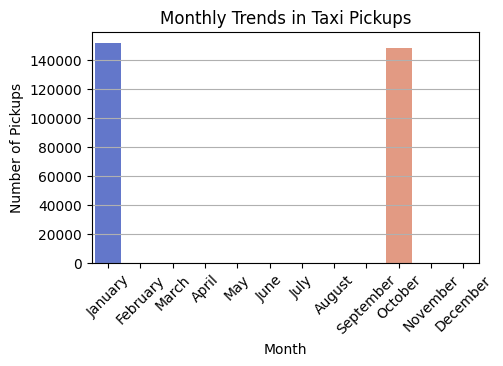

In [56]:
# Show the monthly trends in pickups
import matplotlib.pyplot as plt
import seaborn as sns

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_pickups = df['pickup_month'].value_counts()

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_pickups = monthly_pickups.reindex(month_order)

plt.figure(figsize=(5, 3))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, hue=monthly_pickups.index, palette="coolwarm", legend=False)
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [59]:
# Analyse the above parameters
# Checking for zero or negative values in financial parameters and trip_distance
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
negative_values = df[financial_columns] < 0
zero_values = df[financial_columns] == 0

negative_counts = negative_values.sum()

zero_counts = zero_values.sum()

# final result
print("Negative Values Count:")
print(negative_counts)
print("\nZero Values Count:")
print(zero_counts)

Negative Values Count:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

Zero Values Count:
fare_amount         75
tip_amount       63119
total_amount        45
trip_distance     3596
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes, creating a copy of the DataFrame that excludes rows with zero values in critical financial parameters (fare_amount, total_amount, trip_distance) can be beneficial for clean analysis.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [60]:
# Create a df with non zero entries for the selected parameters.
# Filter out rows where fare_amount or total_amount is zero

df_filtered = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0)].copy()

df_filtered = df_filtered[~((df_filtered['trip_distance'] == 0) & 
                            (df_filtered['PULocationID'] != df_filtered['DOLocationID']))]

print(f"Original DataFrame: {df.shape}")
print(f"Filtered DataFrame: {df_filtered.shape}")




Original DataFrame: (290132, 22)
Filtered DataFrame: (288870, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

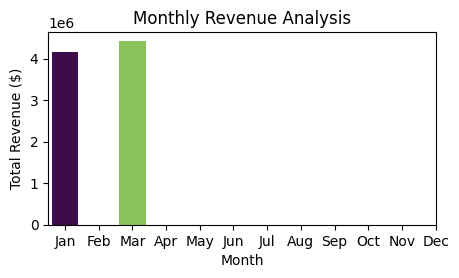

In [62]:
# Group data by month and analyse monthly revenue
plt.figure(figsize=(5, 2.5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, hue=monthly_revenue.index, palette="viridis", legend=False)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Analysis")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
1    48.870207
3     0.000533
4    51.129261
Name: total_amount, dtype: float64


<Axes: xlabel='quarter'>

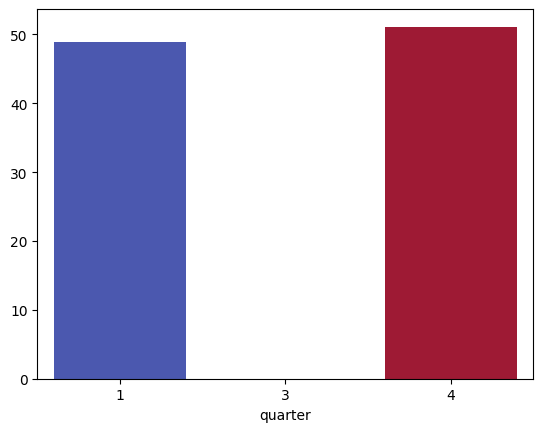

In [65]:
# Calculate proportion of each quarter
# Create a 'quarter' column

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

quarterly_revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# result
print(quarterly_revenue_proportion)

sns.barplot(x=quarterly_revenue_proportion.index, 
            y=quarterly_revenue_proportion.values, 
            hue=quarterly_revenue_proportion.index, 
            palette="coolwarm", legend=False) 


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

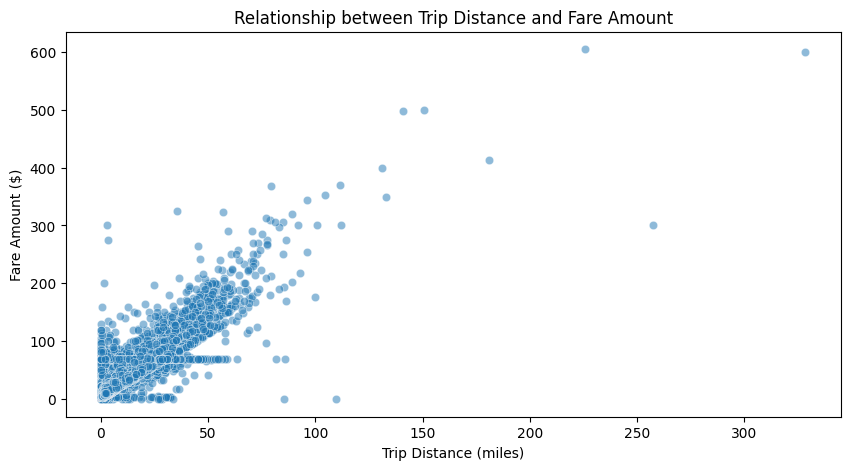

Pearson Correlation between trip_distance and fare_amount: 0.9459


In [66]:
# Show how trip fare is affected by distance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter the trip with zero-distance
df_filtered = df[df['trip_distance'] > 0]

# plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered['trip_distance'], 
                y=df_filtered['fare_amount'], 
                alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship between Trip Distance and Fare Amount")
plt.show()

# Calculate the correlation
correlation = np.corrcoef(df_filtered['trip_distance'], df_filtered['fare_amount'])[0, 1]
print(f"Pearson Correlation between trip_distance and fare_amount: {correlation:.4f}")




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

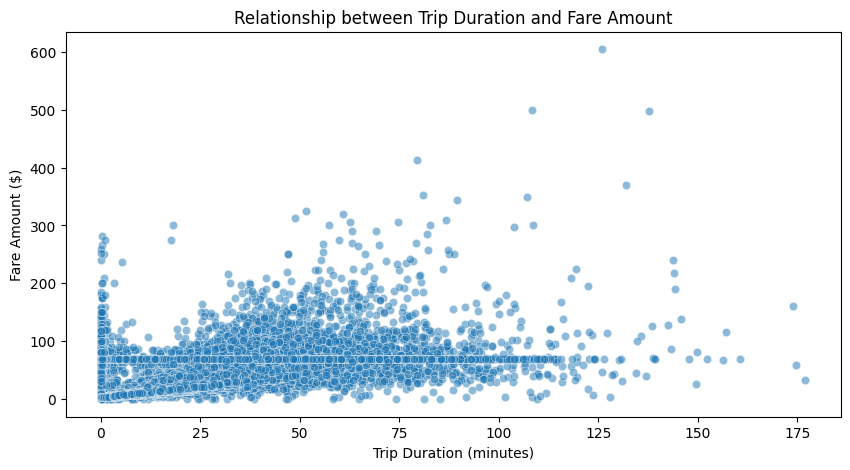

Pearson Correlation between trip_duration and fare_amount: 0.8141


In [68]:
# Show relationship between fare and trip duration
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# trip duration calculation
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60 

# Filtering the zero or extreme trip type durations
df_filtered = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 180)] 

# Graph for this
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered['trip_duration'], 
                y=df_filtered['fare_amount'], 
                alpha=0.5)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship between Trip Duration and Fare Amount")
plt.show()

# correlation
correlation = np.corrcoef(df_filtered['trip_duration'], df_filtered['fare_amount'])[0, 1]
print(f"Pearson Correlation between trip_duration and fare_amount: {correlation:.4f}")


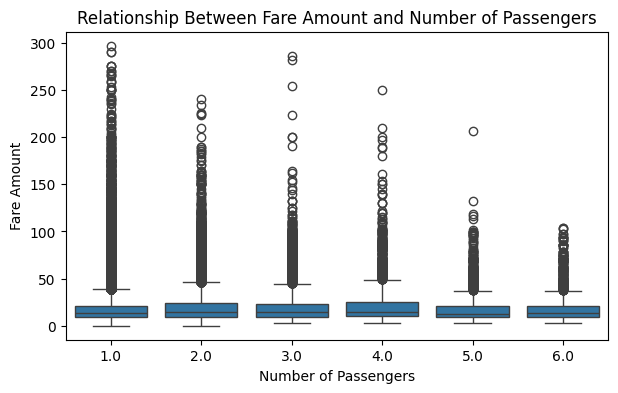

In [74]:
# Show relationship between fare and number of passengers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

# Create the boxplot
sns.boxplot(x="passenger_count", y="fare_amount", data=df_filtered, hue=None)

# title and labels for plots
plt.title("Relationship Between Fare Amount and Number of Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")

plt.show()


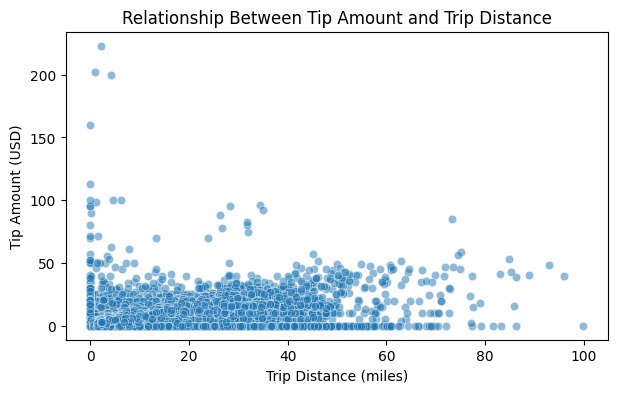

In [75]:
# Show relationship between tip and trip distance

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

sns.scatterplot(x="trip_distance", y="tip_amount", data=df_filtered, alpha=0.5)

plt.title("Relationship Between Tip Amount and Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount (USD)")
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

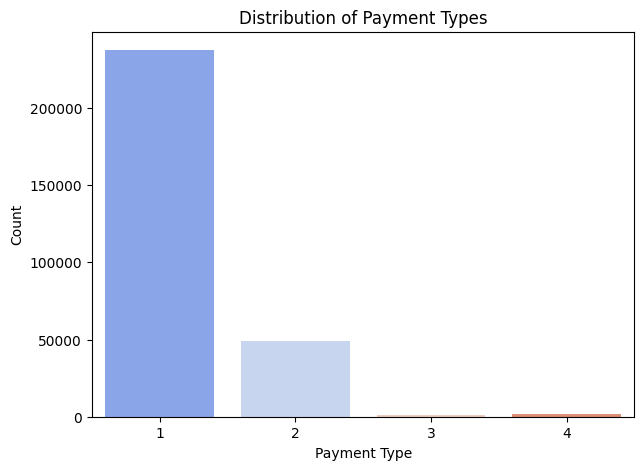

In [77]:
# Analyse the distribution of different payment types (payment_type).

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))

# plot count for payment types with right syntax
sns.countplot(data=df_filtered, x="payment_type", hue="payment_type", palette="coolwarm", legend=False)

plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [81]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.2 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 2.4/16.2 MB 3.9 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.2 MB 3.8 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/16.2 MB 3.9 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.2 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.2 MB 3.9 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/16.2 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/16.2 MB 3.9 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/16.2 MB 3.9 MB/s eta 0:00:03
   ---------------------- ----------------- 8.9/16.2 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 9.7/16.2 MB 3.9 MB/s eta 0:00:02
   ---

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [83]:
import geopandas as gpd

# shapefile using geopandas
zones = gpd.read_file("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Figure size 1000x800 with 0 Axes>

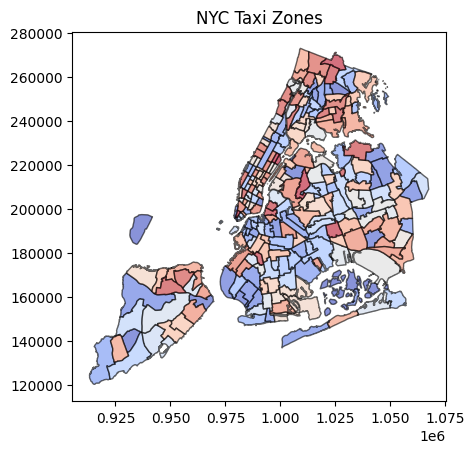

In [84]:
print(zones.info())
# zones.plot()
# Plot (NYC taxi zones)
plt.figure(figsize=(10, 8))
zones.plot(edgecolor="black", cmap="coolwarm", alpha=0.6)
plt.title("NYC Taxi Zones")
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [3]:
# Merge zones and trip records using locationID and PULocationID

import geopandas as gpd
import pandas as pd

# taxi zones dateset
zones = gpd.read_file("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp")

#trip records dataset
trip_records = pd.read_csv("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.csv")

# Rename the LocationID 
zones = zones.rename(columns={"LocationID": "PULocationID"})

# Merging of datasets on PULocationID
merged_df = trip_records.merge(zones, on="PULocationID", how="left")

# Display of first few rows
print(merged_df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-17 15:21:46   2023-10-17 15:47:43              1.0   
1         2  2023-01-05 18:21:15   2023-01-05 18:26:00              4.0   
2         2  2023-01-23 14:51:33   2023-01-23 14:55:36              1.0   
3         2  2023-01-04 14:56:41   2023-01-04 15:19:01              1.0   
4         1  2023-01-11 20:19:28   2023-01-11 20:27:22              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.10         1.0                  N           162           148   
1           0.86         1.0                  N           142           239   
2           0.70         1.0                  N           161           237   
3           3.21         1.0                  N            75           143   
4           1.40         1.0                  N           162           107   

   payment_type  ...  total_amount  congestion_surcharge  airport_fee  \
0

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1]:
# Group data by location and calculate the number of trips

import pandas as pd
import glob

folder_path = "D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/"

# list of all Parquet files
parquet_files = glob.glob(folder_path + "*.parquet")

# concatenate of all Parquet files
trip_records = pd.concat([pd.read_parquet(file) for file in parquet_files])

# (Group by )Pickup Location ID and trips count
trip_counts = trip_records.groupby("PULocationID").size().reset_index(name="trip_count")

# print of top 10 locations(with the most trips)
print(trip_counts.sort_values(by="trip_count", ascending=False).head(10))

     PULocationID  trip_count
129           132     1968545
234           237     1791363
158           161     1763702
233           236     1599220
159           162     1352558
183           186     1303405
135           138     1301935
227           230     1264842
139           142     1256305
167           170     1130220


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [4]:
# Merge trip counts back to the zones GeoDataFrame

import pandas as pd
import geopandas as gpd

# File path of taxi zones shapefile
zones_file = "D:/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp"

#taxi zones data
zones = gpd.read_file(zones_file)

if "LocationID" in zones.columns:
    zones = zones.rename(columns={"LocationID": "PULocationID"})

# DataFrame of trip count (assuming this is your grouped data)
trip_counts = pd.DataFrame({
    "PULocationID": [132, 237, 161, 236, 162, 186, 138, 230, 142, 170],  # Example IDs
    "trip_count": [1968545, 1791363, 1763702, 1599220, 1352558, 1303405, 1301935, 1264842, 1256305, 1130220]
})

#trip counts merge with zones
zones = zones.merge(trip_counts, on="PULocationID", how="left")

# missing trip counts filling with 0
zones["trip_count"] = zones["trip_count"].fillna(0)

#output
print(zones.head())

# Save the merged GeoDataFrame
zones.to_file("merged_zones.shp")
zones.to_csv("merged_zones.csv", index=False)

# Rename the long column names
zones = zones.rename(columns={"PULocationID": "PULocID"})

# Saving it as Shapefile
zones.to_file("merged_zones.shp")

   OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


C:\Users\shash\AppData\Local\Temp\ipykernel_2940\1017133907.py:31: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  zones.to_file("merged_zones.shp")  # For GIS software
C:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'PULocationID' to 'PULocation'
  ogr_write(


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

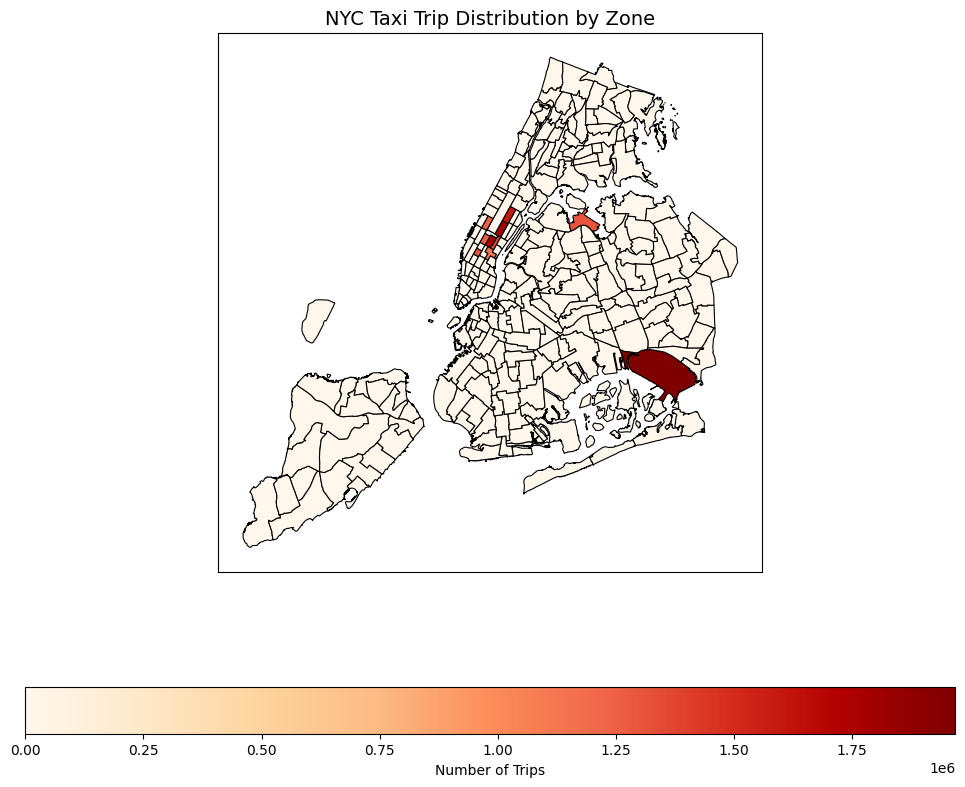

In [5]:
# Define figure and axis

# Plot the map and display it

import matplotlib.pyplot as plt
import geopandas as gpd

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map
zones.plot(column="trip_count",  
           cmap="OrRd",  # Color scale (Oranges-Red)
           linewidth=0.8,  
           edgecolor="black",  
           legend=True,  
           legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"},  
           ax=ax)

ax.set_title("NYC Taxi Trip Distribution by Zone", fontsize=14)


ax.set_xticks([])
ax.set_yticks([])

# Display of the plot
plt.show()




In [6]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort zones by trip count in descending order
sorted_zones = zones.sort_values(by="trip_count", ascending=False)

# Display the first few rows
print(sorted_zones.head(10))  # Show top 10 zones

     OBJECTID  Shape_Leng  Shape_Area                          zone  PULocID  \
131       132    0.245479    0.002038                   JFK Airport      132   
236       237    0.042213    0.000096         Upper East Side South      237   
160       161    0.035804    0.000072                Midtown Center      161   
235       236    0.044252    0.000103         Upper East Side North      236   
161       162    0.035270    0.000048                  Midtown East      162   
185       186    0.024696    0.000037  Penn Station/Madison Sq West      186   
137       138    0.107467    0.000537             LaGuardia Airport      138   
229       230    0.031028    0.000056     Times Sq/Theatre District      230   
141       142    0.038176    0.000076           Lincoln Square East      142   
169       170    0.045769    0.000074                   Murray Hill      170   

       borough                                           geometry  trip_count  
131     Queens  MULTIPOLYGON (((1032791

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [83]:
# Find routes which have the slowest speeds at different times of the day

import pandas as pd

# Load data
df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")

# Convert pickup and dropoff datetime columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create a column name 'trip_duration'
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

df = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)]

# Group by pickup and dropoff zones and calculation of average duration and speed
route_hourly_stats = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_trip_duration=('trip_duration', 'mean'),
    avg_trip_distance=('trip_distance', 'mean')
).reset_index()

#average speed (miles per minute)
route_hourly_stats['avg_speed'] = route_hourly_stats['avg_trip_distance'] / route_hourly_stats['avg_trip_duration']

#slowest routes per hour
slowest_routes = route_hourly_stats.loc[route_hourly_stats.groupby("pickup_hour")["avg_speed"].idxmin()]

#slowest routes for the each hour
print(slowest_routes)





       PULocationID  DOLocationID  pickup_hour  avg_trip_duration  \
35440           158           234            0         704.233333   
3710             45            79            1        1430.466667   
47574           229           137            2        1434.250000   
58869           246           143            3        1221.800000   
37869           162           162            4        1426.366667   
49976           231            61            5        1396.433333   
47105           226           226            6        5016.233333   
19036           114           249            7         350.033333   
19762           125           161            8         491.461111   
17913           113           244            9         297.383333   
2736             43            10           10          53.966667   
6388             61           124           11          47.516667   
33593           148           232           12         706.475000   
3979             48             7 

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

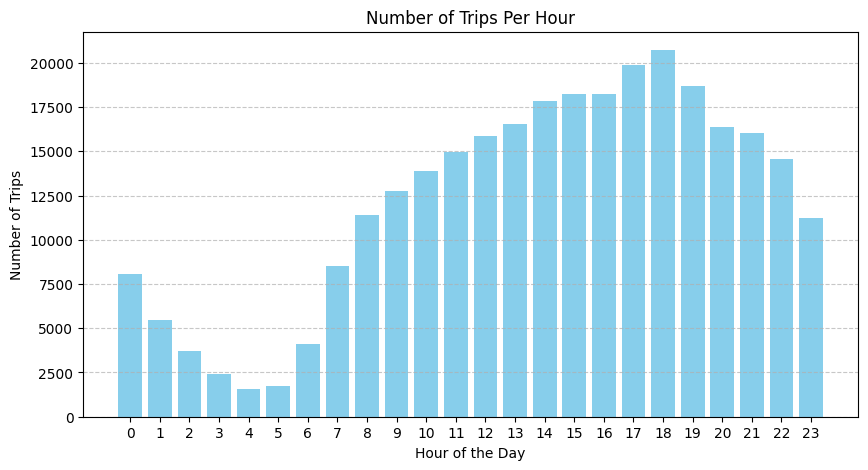

Busiest Hour: 18 with 20723 trips


In [11]:
# Visualise the number of trips per hour and find the busiest hour

import pandas as pd
import matplotlib.pyplot as plt

# number of trips in each hour
hourly_trip_counts = df['pickup_hour'].value_counts().sort_index()

# Plot the number of trips per hour
plt.figure(figsize=(10, 5))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Per Hour')
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# busiest hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_trips = hourly_trip_counts.max()
print(f'Busiest Hour: {busiest_hour} with {busiest_trips} trips')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

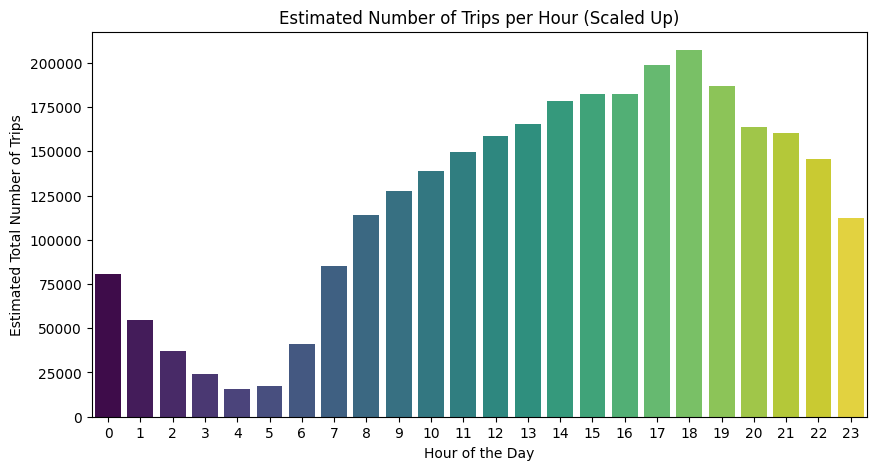

The busiest hour is 18 with an estimated 207230 trips.


In [13]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

import matplotlib.pyplot as plt
import seaborn as sns

sampling_fraction = 0.1 

trip_counts = df['pickup_hour'].value_counts().sort_index()

# Scale up the trip counts
trip_counts_scaled = trip_counts / sampling_fraction

# Ploting  the results
plt.figure(figsize=(10, 5))
sns.barplot(x=trip_counts_scaled.index, y=trip_counts_scaled.values, hue=trip_counts_scaled.index, legend=False, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Total Number of Trips")
plt.title("Estimated Number of Trips per Hour (Scaled Up)")
plt.xticks(range(24))
plt.show()

busiest_hour = trip_counts_scaled.idxmax()
max_trips = trip_counts_scaled.max()
print(f"The busiest hour is {busiest_hour} with an estimated {int(max_trips)} trips.")



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

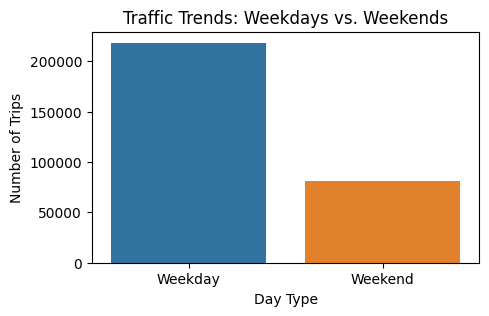

In [66]:
# Compare traffic trends for the week days and weekends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
                                            
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

df['week_category'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

#trips counts for weekdays and weekends
traffic_trends = df['week_category'].value_counts().reset_index()
traffic_trends.columns = ['week_category', 'trip_count']

# Plot the traffic trends
plt.figure(figsize=(5, 3))
sns.barplot(data=traffic_trends, x="week_category", y="trip_count", hue="week_category", palette={"Weekday": "#1f77b4", "Weekend": "#ff7f0e"}, legend=False)
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.title("Traffic Trends: Weekdays vs. Weekends")
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

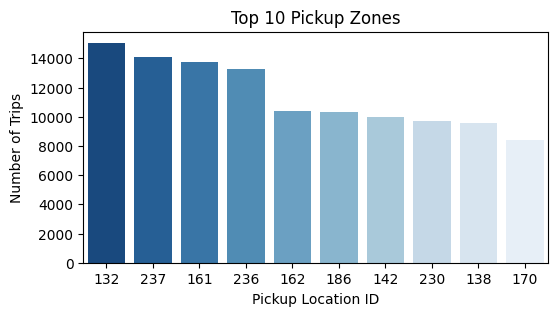

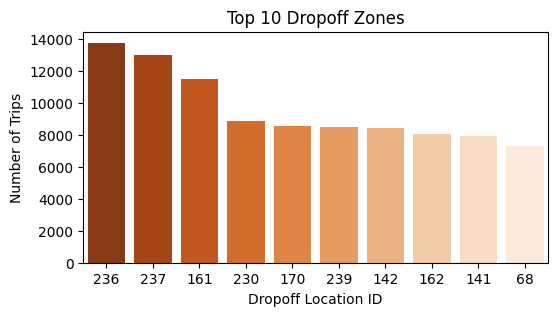

In [87]:
# Find top 10 pickup and dropoff zones

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_pickup_zones = df['PULocationID'].value_counts().head(10)

top_dropoff_zones = df['DOLocationID'].value_counts().head(10)

# Converting index to string for labeling
top_pickup_zones.index = top_pickup_zones.index.astype(str)
top_dropoff_zones.index = top_dropoff_zones.index.astype(str)

# Plot of top 10 Pickup Zones
plt.figure(figsize=(6, 3))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, hue=top_pickup_zones.index, dodge=False, palette="Blues_r")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Pickup Zones")
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

# Plot of top 10 Dropoff Zones
plt.figure(figsize=(6, 3))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, hue=top_dropoff_zones.index, dodge=False, palette="Oranges_r")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Dropoff Zones")
plt.legend([],[], frameon=False)  # Remove legend
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

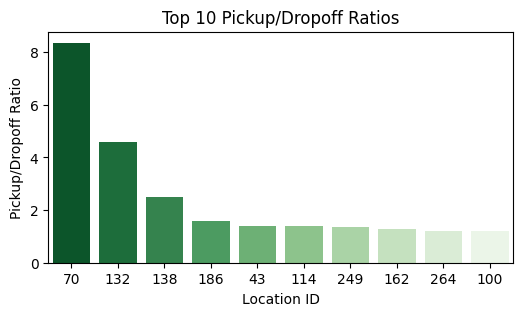

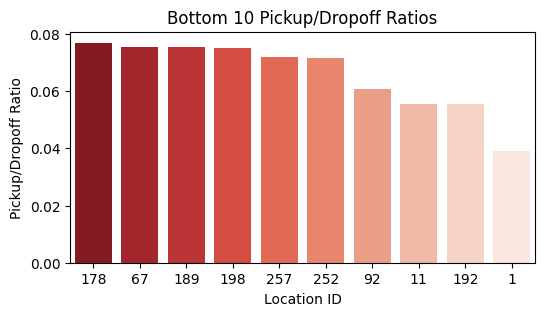

In [68]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count of the pickups and dropoffs per location ID
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

#DataFrame for pickup/dropoff ratios
location_ratios = (pickup_counts / dropoff_counts).dropna().sort_values(ascending=False)

top_10_ratios = location_ratios.head(10)
bottom_10_ratios = location_ratios.tail(10)

# Converting the index to string for better ploting
top_10_ratios.index = top_10_ratios.index.astype(str)
bottom_10_ratios.index = bottom_10_ratios.index.astype(str)

#Top 10 Pickup/Dropoff Ratios
plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_ratios.index, y=top_10_ratios.values, hue=top_10_ratios.index, dodge=False, palette="Greens_r")
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

#Bottom 10 Pickup/Dropoff Ratios
plt.figure(figsize=(6, 3))
sns.barplot(x=bottom_10_ratios.index, y=bottom_10_ratios.values, hue=bottom_10_ratios.index, dodge=False, palette="Reds_r")
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.legend([],[], frameon=False)  # Remove legend
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

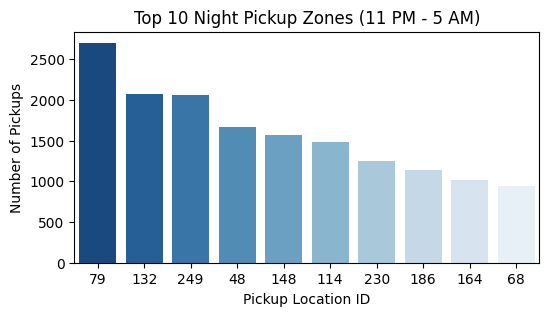

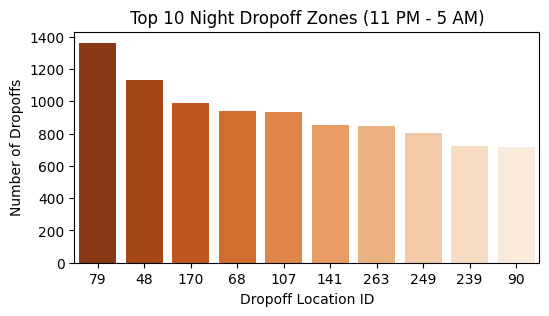

In [69]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

# Filter the data for night hours (11 PM to 5 AM)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

night_pickup_counts = night_df['PULocationID'].value_counts().head(10)
night_dropoff_counts = night_df['DOLocationID'].value_counts().head(10)

night_pickup_counts.index = night_pickup_counts.index.astype(str)
night_dropoff_counts.index = night_dropoff_counts.index.astype(str)

#Top 10 Night Pickup Zones
plt.figure(figsize=(6, 3))
sns.barplot(x=night_pickup_counts.index, y=night_pickup_counts.values, hue=night_pickup_counts.index, dodge=False, palette="Blues_r")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Night Pickup Zones (11 PM - 5 AM)")
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

#Top 10 Night Dropoff Zones
plt.figure(figsize=(6, 3))
sns.barplot(x=night_dropoff_counts.index, y=night_dropoff_counts.values, hue=night_dropoff_counts.index, dodge=False, palette="Oranges_r")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Number of Dropoffs")
plt.title("Top 10 Night Dropoff Zones (11 PM - 5 AM)")
plt.legend([],[], frameon=False)  # Remove legend
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [20]:
# Filter for night hours (11 PM to 5 AM)

import pandas as pd
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

#first few rows of filtered data
print(night_df.head())

    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14         2  2023-10-25 23:13:37   2023-10-25 23:32:01              1.0   
21         2  2023-10-26 00:53:25   2023-10-26 01:02:07              1.0   
29         2  2023-01-22 00:13:49   2023-01-22 00:32:31              4.0   
41         2  2023-01-28 01:09:53   2023-01-28 01:20:37              2.0   
52         1  2023-01-01 01:17:21   2023-01-01 01:23:41              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
14           7.60         1.0                  N           138           166   
21           1.39         1.0                  N           163           164   
29           4.42         1.0                  N            79           236   
41           2.32         1.0                  N           164           141   
52           1.00         1.0                  N           237           142   

    payment_type  ...  tolls_amount  improvement_surcharge  to

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

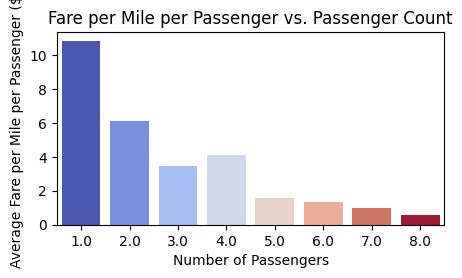

In [70]:
# Analyse the fare per mile per passenger for different passenger counts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# trips with zero trip distance, fare, or passengers
df_filtered = df.loc[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0)].copy()

# Calculation of fare per mile per passenger
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])

# Group by passenger count
# calculation of average fare per mile per passenger
fare_analysis = df_filtered.groupby('passenger_count', as_index=False)['fare_per_mile_per_passenger'].mean()

# final results
plt.figure(figsize=(5, 2.5))
sns.barplot(x="passenger_count", y="fare_per_mile_per_passenger", data=fare_analysis, hue="passenger_count", palette="coolwarm", legend=False)
plt.xlabel("Number of Passengers")
plt.ylabel("Average Fare per Mile per Passenger ($)")
plt.title("Fare per Mile per Passenger vs. Passenger Count")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2014353190.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="fare_per_mile", data=fare_by_day, palette="coolwarm", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue=None, legend=False)


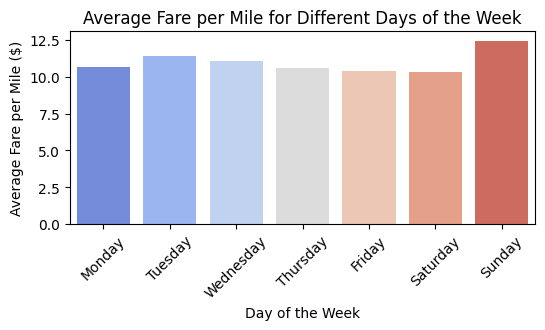

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2014353190.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour_of_day", y="fare_per_mile", data=fare_by_hour, palette="viridis", hue=None, legend=False)


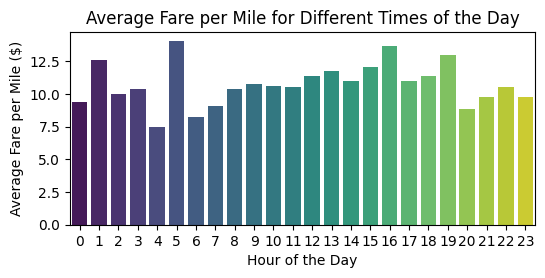

In [71]:
# Compare the average fare per mile for different days and for different times of the day

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df_filtered = df.loc[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


df_filtered['day_of_week'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek
df_filtered['hour_of_day'] = df_filtered['tpep_pickup_datetime'].dt.hour

# Map numeric days
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_filtered['day_of_week'] = df_filtered['day_of_week'].map(day_map)

# Group by day of the week
fare_by_day = df_filtered.groupby('day_of_week', as_index=False)['fare_per_mile'].mean()

# Group by hour of the day
fare_by_hour = df_filtered.groupby('hour_of_day', as_index=False)['fare_per_mile'].mean()

# Fare per Mile by Day of the Week
plt.figure(figsize=(6, 2.5))
sns.barplot(x="day_of_week", y="fare_per_mile", data=fare_by_day, palette="coolwarm", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue=None, legend=False)
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile for Different Days of the Week")
plt.xticks(rotation=45)
plt.show()

# Fare per Mile by Hour of the Day
plt.figure(figsize=(6, 2.5))
sns.barplot(x="hour_of_day", y="fare_per_mile", data=fare_by_hour, palette="viridis", hue=None, legend=False)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile for Different Times of the Day")
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

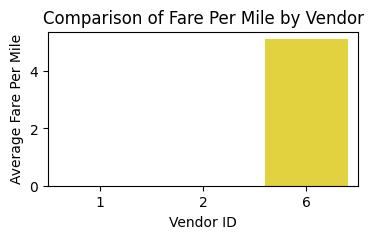

In [74]:
# Compare fare per mile for different vendors

import seaborn as sns
import matplotlib.pyplot as plt

#fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by VendorID and calculation of average fare per mile
fare_by_vendor = df.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Plot of comparison
plt.figure(figsize=(4, 2))
sns.barplot(
    x="VendorID", 
    y="fare_per_mile", 
    data=fare_by_vendor, 
    hue="VendorID",  # Assigning x to hue
    palette="viridis",  
    legend=False  # Hide legend since hue is same as x
)

# Add labels
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare Per Mile")
plt.title("Comparison of Fare Per Mile by Vendor")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


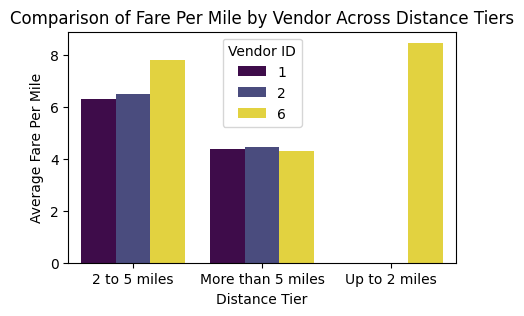

In [75]:
# Defining distance tiers

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def categorize_distance(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

# New column for distance categories
df['distance_tier'] = df['trip_distance'].apply(categorize_distance)

#fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by VendorID and distance tier for the calculation of average fare per mile
fare_by_vendor_tier = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# final results
plt.figure(figsize=(5, 3))
sns.barplot(
    x="distance_tier", 
    y="fare_per_mile", 
    hue="VendorID",  
    data=fare_by_vendor_tier, 
    palette="viridis"
)

# Add labels
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare Per Mile")
plt.title("Comparison of Fare Per Mile by Vendor Across Distance Tiers")
plt.legend(title="Vendor ID")
plt.show()




##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

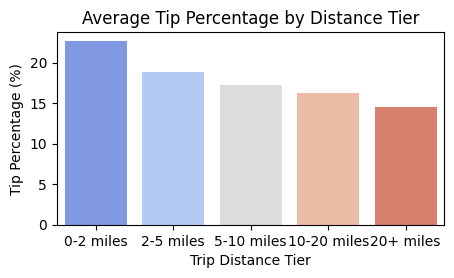

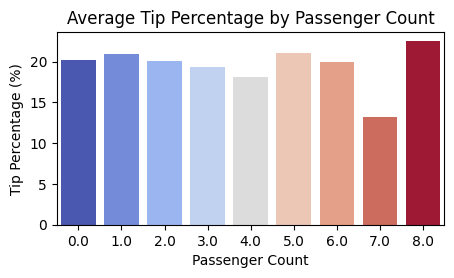

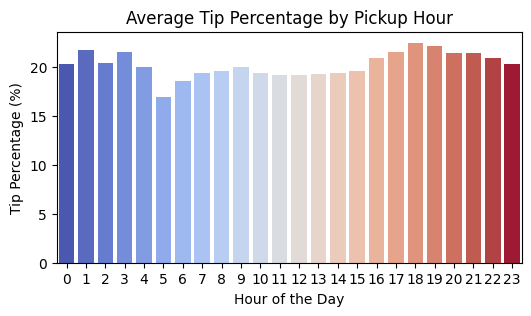

In [76]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount'].replace(0, pd.NA)) * 100

#Analyze tip percentages based on trip distance
df_filtered = df[df['trip_distance'] > 0].copy()  # Use .copy() to avoid SettingWithCopyWarning

#distance tiers safely
df_filtered.loc[:, 'distance_tier'] = pd.cut(
    df_filtered['trip_distance'],
    bins=[0, 2, 5, 10, 20, float('inf')],
    labels=['0-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20+ miles'],
    include_lowest=True
)

tip_by_distance = df_filtered.groupby('distance_tier', observed=True)['tip_percentage'].mean().reset_index()

# Plot tip percentage vs distance tier
plt.figure(figsize=(5, 2.5))
sns.barplot(x="distance_tier", y="tip_percentage", data=tip_by_distance, palette="coolwarm", hue="distance_tier", legend=False)
plt.title("Average Tip Percentage by Distance Tier")
plt.xlabel("Trip Distance Tier")
plt.ylabel("Tip Percentage (%)")
plt.show()

#Analyze tip percentages based on passenger count
tip_by_passenger = df.groupby('passenger_count', observed=True)['tip_percentage'].mean().reset_index()

plt.figure(figsize=(5, 2.5))
sns.barplot(x="passenger_count", y="tip_percentage", data=tip_by_passenger, palette="coolwarm", hue="passenger_count", legend=False)
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.show()

#Analyze tip percentages based on pickup hour
df.loc[:, 'pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

tip_by_hour = df.groupby('pickup_hour', observed=True)['tip_percentage'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x="pickup_hour", y="tip_percentage", data=tip_by_hour, palette="coolwarm", hue="pickup_hour", legend=False)
plt.title("Average Tip Percentage by Pickup Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Tip Percentage (%)")
plt.xticks(range(24))
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'distance_tier'] = pd.cut(
C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="distance_tier", y="tip_percentage", data=tip_by_distance, palette="coolwarm")


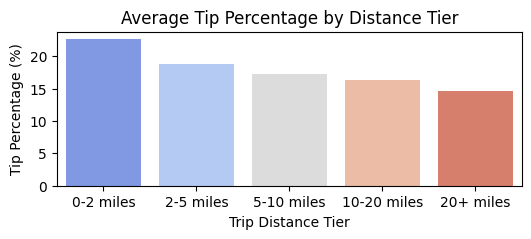

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="passenger_count", y="tip_percentage", data=tip_by_passenger, palette="coolwarm")


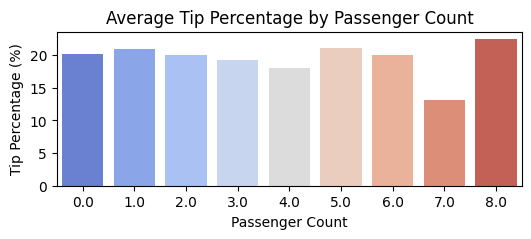

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pickup_hour", y="tip_percentage", data=tip_by_hour, palette="coolwarm")


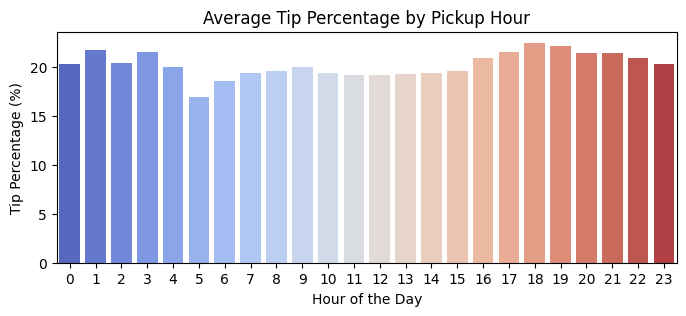

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tip_category", y="trip_distance", data=trip_distance_by_tip, palette="coolwarm")


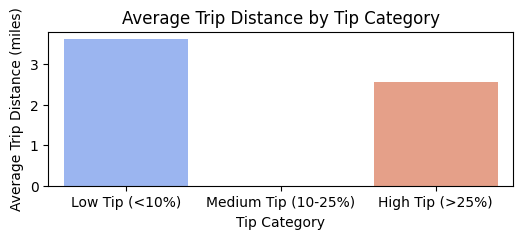

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tip_category", y="fare_amount", data=fare_by_tip, palette="coolwarm")


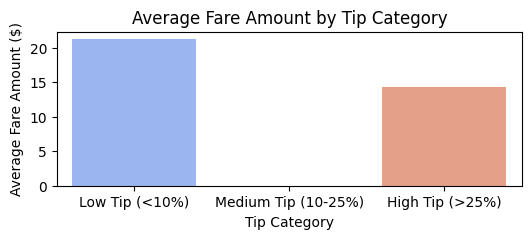

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\2538716078.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tip_category", y="passenger_count", data=passenger_by_tip, palette="coolwarm")


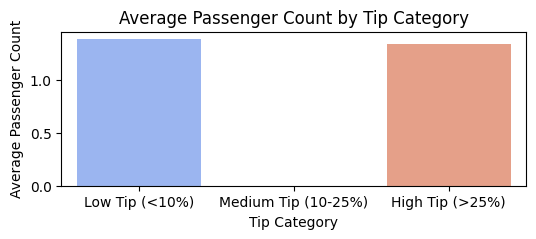

In [77]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df.loc[df['fare_amount'] > 0, 'tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

df = df.dropna(subset=['tip_percentage'])

#Analyze tip percentages based on trip distance
df_filtered = df[df['trip_distance'] > 0]  # Remove zero distance trips
df_filtered.loc[:, 'distance_tier'] = pd.cut(
    df_filtered['trip_distance'], 
    bins=[0, 2, 5, 10, 20, float('inf')], 
    labels=['0-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20+ miles']
)

tip_by_distance = df_filtered.groupby('distance_tier', observed=False)['tip_percentage'].mean().reset_index()

# Plot tip percentage vs distance tier
plt.figure(figsize=(6, 2))
sns.barplot(x="distance_tier", y="tip_percentage", data=tip_by_distance, palette="coolwarm")
plt.title("Average Tip Percentage by Distance Tier")
plt.xlabel("Trip Distance Tier")
plt.ylabel("Tip Percentage (%)")
plt.show()

#Analyze tip percentages based on passenger count
tip_by_passenger = df.groupby('passenger_count', observed=False)['tip_percentage'].mean().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(x="passenger_count", y="tip_percentage", data=tip_by_passenger, palette="coolwarm")
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.show()

#Analyze tip percentages based on pickup hour
df.loc[:, 'pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup hour and calculate average tip percentage
tip_by_hour = df.groupby('pickup_hour', observed=False)['tip_percentage'].mean().reset_index()

plt.figure(figsize=(8, 3))
sns.barplot(x="pickup_hour", y="tip_percentage", data=tip_by_hour, palette="coolwarm")
plt.title("Average Tip Percentage by Pickup Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Tip Percentage (%)")
plt.xticks(range(24))
plt.show()

#Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_filtered = df.copy()  # Avoid SettingWithCopyWarning

# Handle NaN values
df_filtered = df_filtered.dropna(subset=['tip_percentage'])

# Define tip categories
df_filtered.loc[:, 'tip_category'] = pd.cut(
    df_filtered['tip_percentage'],
    bins=[-float('inf'), 10, 25, float('inf')],
    labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)']
)

#only Low and High tip categories keep
df_filtered = df_filtered[df_filtered['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

# Comparition of trip distance by tip category
trip_distance_by_tip = df_filtered.groupby('tip_category', observed=False)['trip_distance'].mean().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(x="tip_category", y="trip_distance", data=trip_distance_by_tip, palette="coolwarm")
plt.title("Average Trip Distance by Tip Category")
plt.xlabel("Tip Category")
plt.ylabel("Average Trip Distance (miles)")
plt.show()

#Comparition fare amount by tip category
fare_by_tip = df_filtered.groupby('tip_category', observed=False)['fare_amount'].mean().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(x="tip_category", y="fare_amount", data=fare_by_tip, palette="coolwarm")
plt.title("Average Fare Amount by Tip Category")
plt.xlabel("Tip Category")
plt.ylabel("Average Fare Amount ($)")
plt.show()

# Comparition passenger count by tip category
passenger_by_tip = df_filtered.groupby('tip_category', observed=False)['passenger_count'].mean().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(x="tip_category", y="passenger_count", data=passenger_by_tip, palette="coolwarm")
plt.title("Average Passenger Count by Tip Category")
plt.xlabel("Tip Category")
plt.ylabel("Average Passenger Count")
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\353949134.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tip_category", y="trip_distance", data=trip_distance_by_tip, palette="coolwarm")


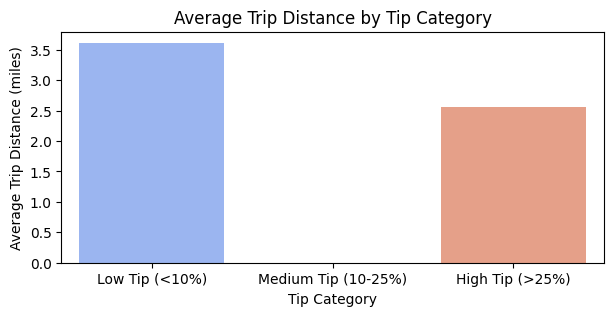

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\353949134.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tip_category", y="fare_amount", data=fare_by_tip, palette="coolwarm")


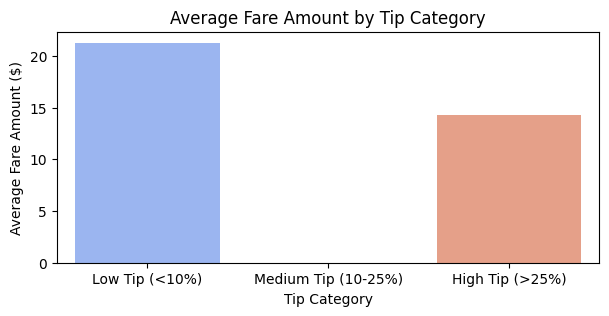

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\353949134.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tip_category", y="passenger_count", data=passenger_by_tip, palette="coolwarm")


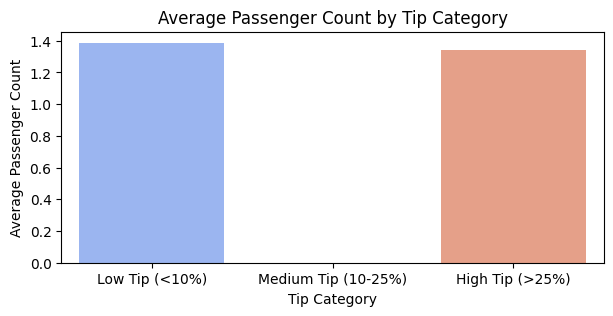

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")

# Convert the pickup datetime column to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Calculate tip percentage safely
df.loc[df['fare_amount'] > 0, 'tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Drop NaN values in tip_percentage before binning
df = df.dropna(subset=['tip_percentage'])

# Define tip categories: Low Tips (<10%) and High Tips (>25%)
df.loc[:, 'tip_category'] = pd.cut(
    df['tip_percentage'],
    bins=[-float('inf'), 10, 25, float('inf')],
    labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)']
)

# Keep only Low and High tip categories
df_filtered = df[df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

#Comparition with Average Trip Distance
trip_distance_by_tip = df_filtered.groupby('tip_category', observed=False)['trip_distance'].mean().reset_index()

plt.figure(figsize=(7, 3))
sns.barplot(x="tip_category", y="trip_distance", data=trip_distance_by_tip, palette="coolwarm")
plt.title("Average Trip Distance by Tip Category")
plt.xlabel("Tip Category")
plt.ylabel("Average Trip Distance (miles)")
plt.show()

#Comparison with Average Fare Amount
fare_by_tip = df_filtered.groupby('tip_category', observed=False)['fare_amount'].mean().reset_index()

plt.figure(figsize=(7, 3))
sns.barplot(x="tip_category", y="fare_amount", data=fare_by_tip, palette="coolwarm")
plt.title("Average Fare Amount by Tip Category")
plt.xlabel("Tip Category")
plt.ylabel("Average Fare Amount ($)")
plt.show()

#Comparison with Average Passenger Count
passenger_by_tip = df_filtered.groupby('tip_category', observed=False)['passenger_count'].mean().reset_index()

plt.figure(figsize=(7, 3))
sns.barplot(x="tip_category", y="passenger_count", data=passenger_by_tip, palette="coolwarm")
plt.title("Average Passenger Count by Tip Category")
plt.xlabel("Tip Category")
plt.ylabel("Average Passenger Count")
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

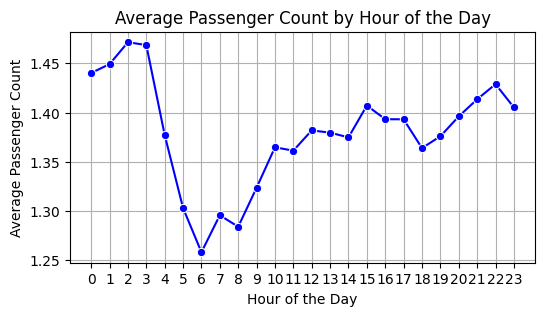

C:\Users\shash\AppData\Local\Temp\ipykernel_11416\825724992.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="passenger_count", data=passenger_by_day, palette="coolwarm")


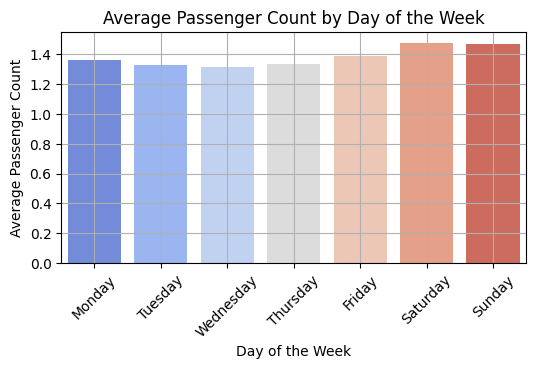

In [79]:
# See how passenger count varies across hours and days

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

df = df[df['passenger_count'] > 0]

#Passenger Count by Hour of the Day
passenger_by_hour = df.groupby('pickup_hour', observed=False)['passenger_count'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(x="pickup_hour", y="passenger_count", data=passenger_by_hour, marker="o", color="b")
plt.title("Average Passenger Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(24))
plt.grid()
plt.show()

#Passenger Count by Day of the Week
passenger_by_day = df.groupby('day_of_week', observed=False)['passenger_count'].mean().reset_index()

# Order days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_by_day['day_of_week'] = pd.Categorical(passenger_by_day['day_of_week'], categories=days_order, ordered=True)
passenger_by_day = passenger_by_day.sort_values('day_of_week')

plt.figure(figsize=(6, 3))
sns.barplot(x="day_of_week", y="passenger_count", data=passenger_by_day, palette="coolwarm")
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

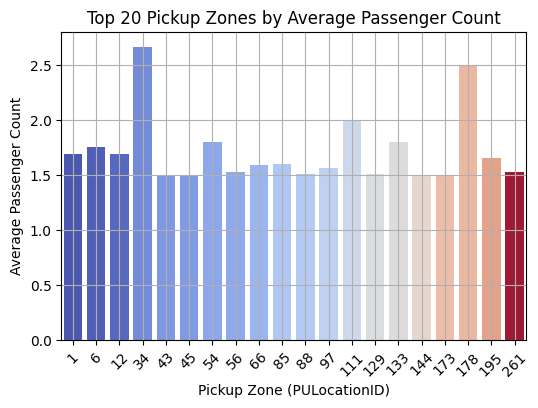

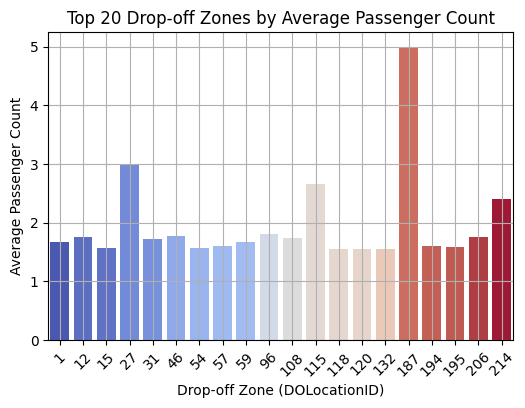

In [80]:
# How does passenger count vary across zones

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")

df = df[df['passenger_count'] > 0]

#Passenger Count by Pickup Zone
passenger_by_pickup = df.groupby('PULocationID', observed=False)['passenger_count'].mean().reset_index()
passenger_by_pickup = passenger_by_pickup.sort_values(by="passenger_count", ascending=False).head(20)  # Top 20 zones

plt.figure(figsize=(6, 4))
sns.barplot(x="PULocationID", y="passenger_count", hue="PULocationID", data=passenger_by_pickup, legend=False, palette="coolwarm")
plt.title("Top 20 Pickup Zones by Average Passenger Count")
plt.xlabel("Pickup Zone (PULocationID)")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#Passenger Count by Drop-off Zone
passenger_by_dropoff = df.groupby('DOLocationID', observed=False)['passenger_count'].mean().reset_index()
passenger_by_dropoff = passenger_by_dropoff.sort_values(by="passenger_count", ascending=False).head(20)  # Top 20 zones

plt.figure(figsize=(6, 4))
sns.barplot(x="DOLocationID", y="passenger_count", hue="DOLocationID", data=passenger_by_dropoff, legend=False, palette="coolwarm")
plt.title("Top 20 Drop-off Zones by Average Passenger Count")
plt.xlabel("Drop-off Zone (DOLocationID)")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.grid()
plt.show()

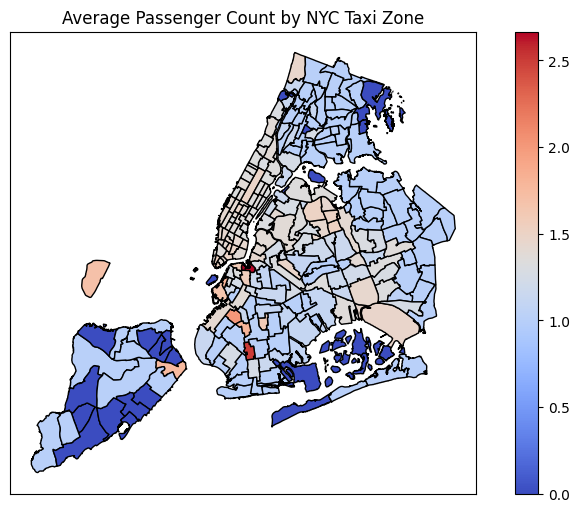

In [81]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

zones = gpd.read_file("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp")

df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")

#invalid passenger counts
df = df[df['passenger_count'] > 0]

#average passenger count per pickup zone
passenger_by_zone = df.groupby('PULocationID', observed=False)['passenger_count'].mean().reset_index()
passenger_by_zone.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

zones_with_trips = zones.merge(passenger_by_zone, on="LocationID", how="left")

zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

# plot
fig, ax = plt.subplots(figsize=(10, 6))
zones_with_trips.plot(column="avg_passenger_count", cmap="coolwarm", edgecolor="black", legend=True, ax=ax)

# Set title
ax.set_title("Average Passenger Count by NYC Taxi Zone")

# Hide axis labels
ax.set_xticks([])
ax.set_yticks([])

# Show plot
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

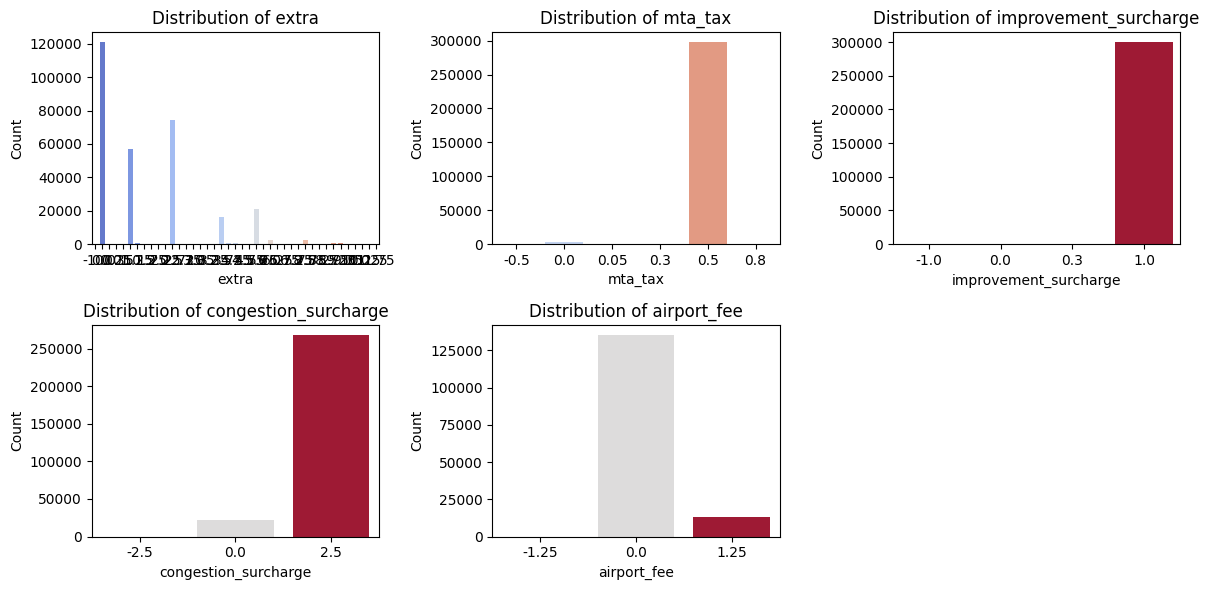

In [50]:
# How often is each surcharge applied?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the taxi trip dataset
df = pd.read_parquet("D:/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet")

# All surcharge-related columns
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

#figure for visualization
plt.figure(figsize=(12, 6))

# Count occurrences for each surcharge column and visualize
for i, col in enumerate(surcharge_columns, 1):
    plt.subplot(2, 3, i)  # Create subplots
    surcharge_counts = df[col].value_counts()

    sns.barplot(x=surcharge_counts.index, 
                y=surcharge_counts.values, 
                hue=surcharge_counts.index,  # Assign hue to the x variable
                palette="coolwarm", 
                legend=False)  # Hide legend

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()





## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Optimize routing and dispatching by analyzing the demand in peak hours and slow down the operational in-efficiencies.
Real-time tracking system should be implemented to improve availability of taxi in high-demand zone.
Enhance the distribution of fleet to reduce the passenger waiting times and enhance the operational efficiency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Based on historical trip trends, cabs should be positioned strategically across different zones.
This step help in ensuring the better service coverage of cab and reduced idle time for drivers.
Better utilize the predictive analytics to forecast the demand surges and resource allocation done proactively for this surge.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Using data insights and analysis, adjust the fare strategies to increase the revenue while remaining competitive.
Integrate the dynamic fare or pricing during peak hours to balance demand and supply effectively.
Targeted discounts or incentives should be introduced to encourage rides during off-peak hours and maintain good and steady revenue.